## Global Food Price

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
pd.options.display.float_format = "{:,.2f}".format
sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
gfp = pd.read_csv('wfpvam_foodprices.csv')

In [3]:
#Setting display
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.width', 1000) 

In [4]:
gfp.head()

,date,country,city,market,product,currency,type,unit,mp_month,mp_year,price
0,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00
1,2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00"
2,2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00
3,2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62
4,2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64


In [5]:
print(f"This data comtains {gfp.shape[0]} rows and {gfp.shape[1]} columns")

This data comtains 1871957 rows and 11 columns


In [6]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871957 entries, 0 to 1871956
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   country   object 
 2   city      object 
 3   market    object 
 4   product   object 
 5   currency  object 
 6   type      object 
 7   unit      object 
 8   mp_month  int64  
 9   mp_year   int64  
 10  price     float64
dtypes: float64(1), int64(2), object(8)
memory usage: 157.1+ MB


In [7]:
gfp.head()

,date,country,city,market,product,currency,type,unit,mp_month,mp_year,price
0,2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00
1,2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00"
2,2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00
3,2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62
4,2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64


In [8]:
gfp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,1871957,257,2020-10-01,35827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1871957,98,Rwanda,136993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1871957,616,North/Amajyaruguru,597057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,1871957,3193,National Average,18173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,1871957,816,Rice (imported) - Retail,51567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,1871957,84,XOF,244765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1871957,4,Retail,1705390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit,1871957,121,KG,1447701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp_month,"1,871,957.00",NaN,NaN,NaN,6.39,3.46,1.00,3.00,6.00,9.00,12.00
mp_year,"1,871,957.00",NaN,NaN,NaN,"2,015.97",4.23,"2,000.00","2,013.00","2,017.00","2,020.00","2,021.00"


In [9]:
#Checking for missing data
gfp.isnull().sum()

date        0
country     0
city        0
market      0
product     0
currency    0
type        0
unit        0
mp_month    0
mp_year     0
price       0
dtype: int64

In [10]:
#gfp['city'].value_counts()

In [11]:
curr_convert = pd.read_csv('currency convert.csv')

In [12]:
curr_convert.drop(['Currency', 'Date'], axis = 1, inplace = True)

In [13]:
curr_convert.shape

(222, 3)

In [14]:
#gfp_new= pd.merge(gfp, curr_convert, how = "inner", on=["currency"])

In [15]:
gfp.shape

(1871957, 11)

In [16]:
#Checking for missing data
gfp.isnull().sum()

date        0
country     0
city        0
market      0
product     0
currency    0
type        0
unit        0
mp_month    0
mp_year     0
price       0
dtype: int64

In [17]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871957 entries, 0 to 1871956
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   country   object 
 2   city      object 
 3   market    object 
 4   product   object 
 5   currency  object 
 6   type      object 
 7   unit      object 
 8   mp_month  int64  
 9   mp_year   int64  
 10  price     float64
dtypes: float64(1), int64(2), object(8)
memory usage: 157.1+ MB


## Exploratary Data Analysis

In [18]:
gfp.describe()

,mp_month,mp_year,price
count,"1,871,957.00","1,871,957.00","1,871,957.00"
mean,6.39,"2,015.97","6,615.07"
std,3.46,4.23,"111,656.12"
min,1.00,"2,000.00",0.00
25%,3.00,"2,013.00",42.62
50%,6.00,"2,017.00",236.00
75%,9.00,"2,020.00","1,101.00"
max,12.00,"2,021.00","21,777,780.00"


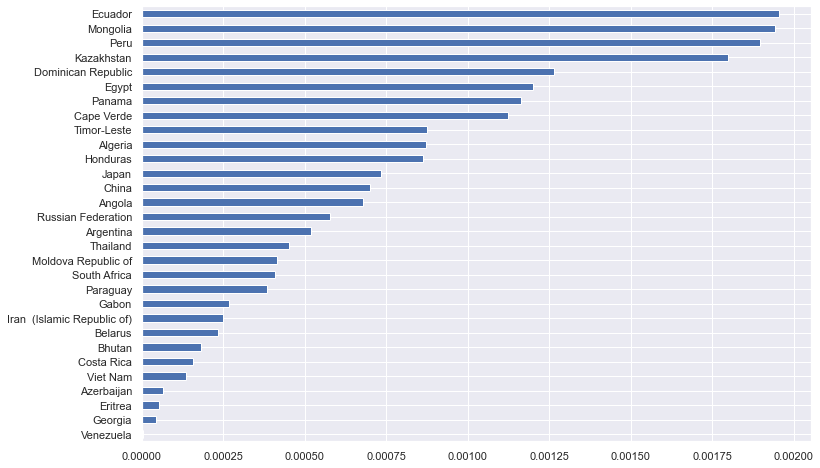

In [19]:
# %percentage production of each country
(gfp['country'].value_counts(normalize=True).sort_values(ascending=True))[:30].plot(kind='barh')

In [20]:
gfp.pivot_table(values=['price'],index=['country','product'],aggfunc=['max', 'min', 'mean', 'count', 'sum'])

max        min         mean count            sum
                                                                      price      price        price price          price
country     product                                                                                                     
Afghanistan Bread - Retail                                            71.00       6.00        38.73  1668      64,604.73
            Exchange rate - Retail                                    80.42      56.48        72.21   968      69,895.86
            Livestock (sheep, one-year-old alive female) - ... 5,833,333.00 168,889.00 1,786,756.29   187 334,123,425.73
            Oil (cooking) - Retail                                   147.50      78.00       107.74   408      43,958.20
            Pulses - Retail                                          138.75      65.60        92.17   408      37,605.53
...                                                                     ...        ...          ...   ...            ...
Zimbabwe    Sugar (white, fortified) - Retail                          3.00       0.75         1.27   103         130.34
            Sugar - Retail                                           150.00      95.71       115.23   295      33,991.66
            Toothpaste - Retail                                      273.33      75.00       110.22   287      31,632.86
            Wheat - Retail                                             1.25       0.40         0.51    64          32.72
            Wheat flour (fortified) - Retail                           4.75       0.90         1.28    79         100.76

[2389 rows x 5 columns]

In [21]:
gfp.groupby('country')['price'].count().sort_values(ascending=False)[:25]


country
Rwanda                              136993
Bassas da India                     125815
Syrian Arab Republic                 93566
Philippines                          77251
Indonesia                            72353
Mali                                 67018
Burundi                              55591
Kyrgyzstan                           55250
Gambia                               51309
Niger                                48475
Nigeria                              47551
Democratic Republic of the Congo     43726
Zambia                               41845
United Republic of Tanzania          41590
Mozambique                           40464
Libya                                39354
Lebanon                              38000
Benin                                34802
Burkina Faso                         33213
Senegal                              33044
Yemen                                28551
Lao People's Democratic Republic     27013
Ukraine                              26761
Taj

In [22]:
gfp.groupby('mp_year')['price'].count()

mp_year
2000      3599
2001      4087
2002      5967
2003      8520
2004      9484
2005     13545
2006     19004
2007     26017
2008     35891
2009     42971
2010     47032
2011     64175
2012     85009
2013    104448
2014    115793
2015    130348
2016    140272
2017    163146
2018    173301
2019    191311
2020    373899
2021    114138
Name: price, dtype: int64

Text(0, 0.5, 'Price')

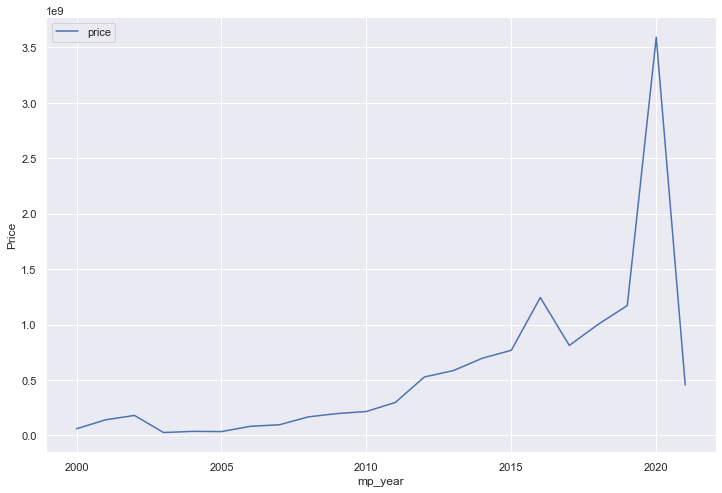

In [23]:
# Plot trend year-on-year
gfp.groupby('mp_year').sum().reset_index().plot(y='price', x='mp_year',  figsize=(12,8))
plt.ylabel('Price')

In [24]:
items= gfp.groupby("product")["price"].count().sort_values(ascending=False)[:25]
items

product
Rice (imported) - Retail         51567
Millet - Retail                  51216
Maize - Retail                   47132
Sorghum - Retail                 45020
Wheat flour - Retail             44434
Sugar - Retail                   43374
Maize (white) - Retail           39777
Rice - Retail                    37632
Rice (local) - Retail            36616
Tomatoes - Retail                29556
Eggs - Retail                    27636
Potatoes - Retail                26800
Onions - Retail                  26125
Oil (palm) - Retail              25564
Meat (beef) - Retail             25292
Groundnuts (shelled) - Retail    24970
Oil (vegetable) - Retail         24766
Salt - Retail                    23091
Wheat - Retail                   20620
Beans (niebe) - Retail           18020
Beans (dry) - Retail             17232
Cabbage - Retail                 15867
Carrots - Retail                 15499
Sweet potatoes - Retail          14968
Lentils - Retail                 14525
Name: price, dtyp

Text(0.5, 1.0, 'Top 25 items purchase around globe')

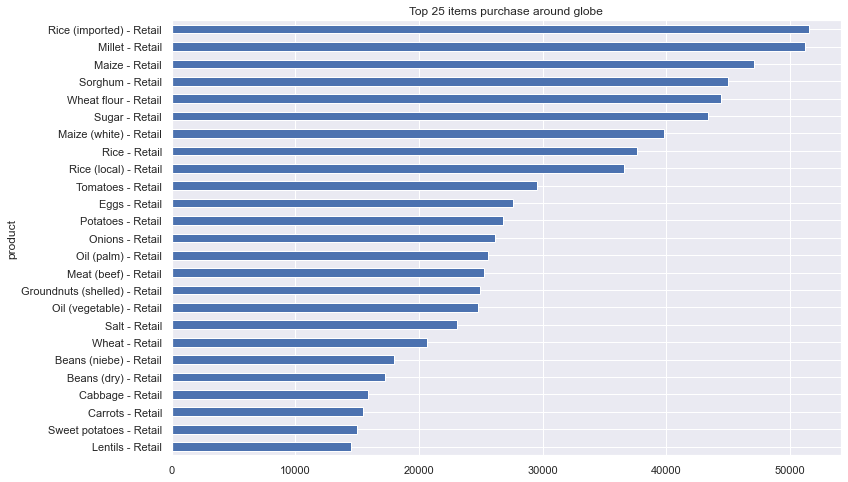

In [25]:
items.sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))
plt.title("Top 25 items purchase around globe")

In [26]:
top_countries=gfp.groupby("country")["price"].count().sort_values(ascending=False)[:10]
top_countries

country
Rwanda                  136993
Bassas da India         125815
Syrian Arab Republic     93566
Philippines              77251
Indonesia                72353
Mali                     67018
Burundi                  55591
Kyrgyzstan               55250
Gambia                   51309
Niger                    48475
Name: price, dtype: int64

Text(0.5, 1.0, 'Top Ten Producung Countries')

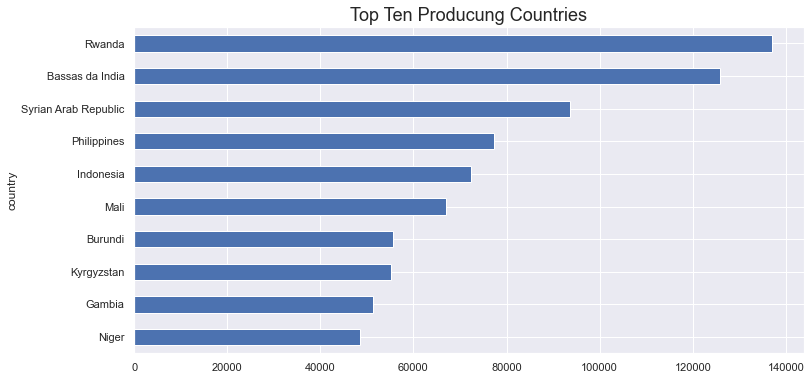

In [27]:
top_countries.sort_values(ascending= True).plot(kind='barh', figsize=(12, 6))
plt.title('Top Ten Producung Countries',fontsize=18)

## Time Series Analysis

In [28]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

## Preproceesing

In [29]:
gfp['date'] = pd.to_datetime(gfp['date'])
gfp.set_index("date", inplace = True)

In [30]:
gfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1871957 entries, 2000-01-01 to 2021-05-01
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   country   object 
 1   city      object 
 2   market    object 
 3   product   object 
 4   currency  object 
 5   type      object 
 6   unit      object 
 7   mp_month  int64  
 8   mp_year   int64  
 9   price     float64
dtypes: float64(1), int64(2), object(7)
memory usage: 157.1+ MB


In [31]:
gfp.head()

,country,city,market,product,currency,type,unit,mp_month,mp_year,price
date,,,,,,,,,,
2000-01-01,Bassas da India,North/Amajyaruguru,Kolkata,Oil (mustard) - Retail,INR,Retail,KG,1,2000,44.00
2000-01-01,Somalia,Mudug,Gaalkacyo,Milk (camel) - Retail,SOS,Retail,L,1,2000,"1,900.00"
2000-01-01,Senegal,Dakar,Tilene,Maize (imported) - Retail,XOF,Retail,KG,1,2000,149.00
2000-01-01,Mexico,Jalisco,Guadalajara,Maize (white) - Wholesale,MXN,Wholesale,KG,1,2000,1.62
2000-01-01,Nicaragua,North/Amajyaruguru,Managua,Maize (white) - Wholesale,NIO,Wholesale,46 KG,1,2000,122.64


## Downsampling

In [32]:
gfp_monthly = gfp.resample(rule= 'M').median()
gfp_monthly.shape

(257, 3)

In [33]:
gfp_monthly.head()

,mp_month,mp_year,price
date,,,
2000-01-31,1,2000,50.00
2000-02-29,2,2000,44.00
2000-03-31,3,2000,41.00
2000-04-30,4,2000,38.50
2000-05-31,5,2000,35.00


In [34]:
gfp_monthly.drop(['mp_month','mp_year'] , axis = 1, inplace = True)

Text(0, 0.5, 'Price')

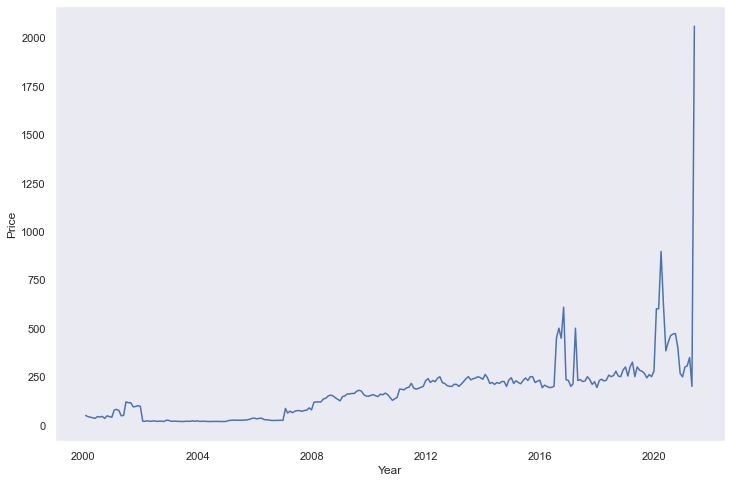

In [35]:
plt.plot(gfp_monthly.index, gfp_monthly)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Price')

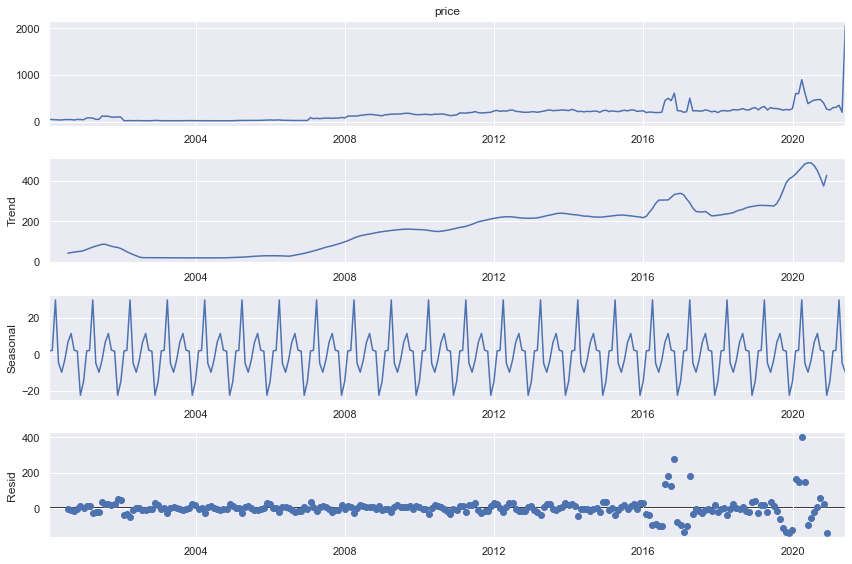

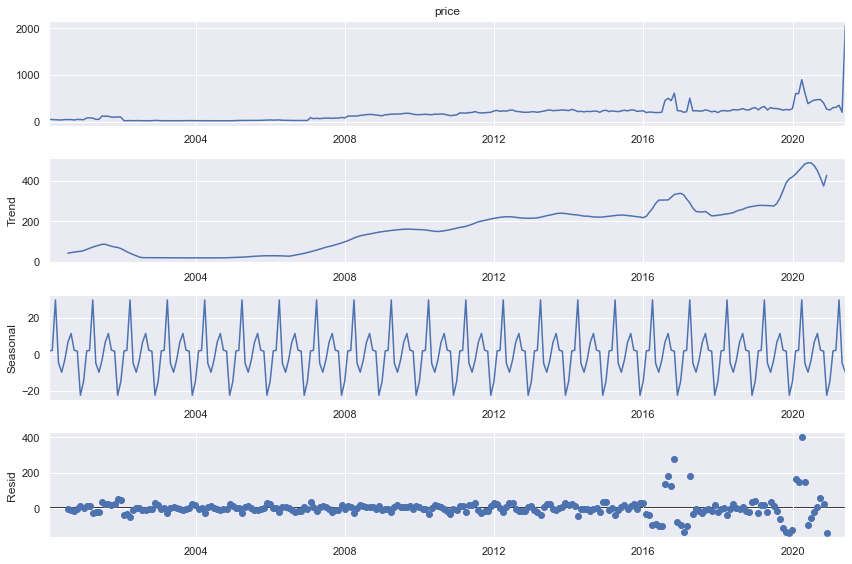

In [36]:
decompose_series = sm.tsa.seasonal_decompose(gfp_monthly['price'], model='additive')
decompose_series.plot()

In [37]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(gfp_monthly)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: 2.0646298384870385
p-value: 0.9987512659009226
No. of lags used: 16
No. of observations used : 240
Critical Values:
   1%: -3.4578942529658563
   5%: -2.8736593200231484
   10%: -2.573228767361111


**From the results obtained, the p-value is greater than the critical value at a 5% significance level and,** 

**the ADF statistic is greater that any of the critical values obtain.**

**This confirms that the series is indeed non-stationary.**

**We will proceed to time series to stationary by removing trend and seasonality**

### Autocorrelation & Partial Autocorrelation Plot

In [38]:
from statsmodels.tsa.stattools import  acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

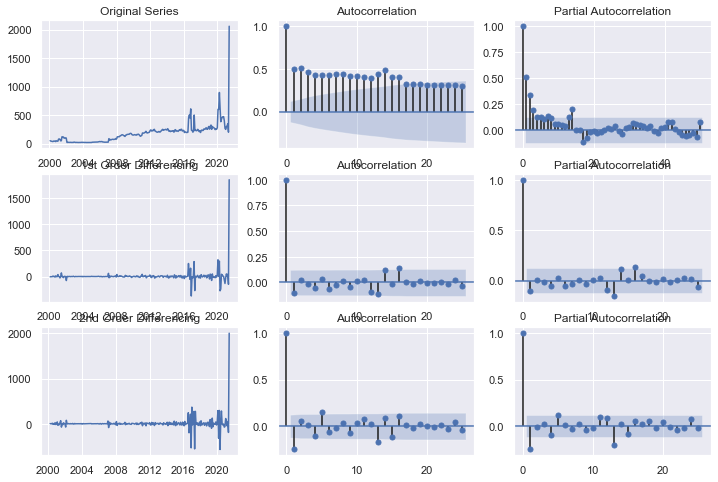

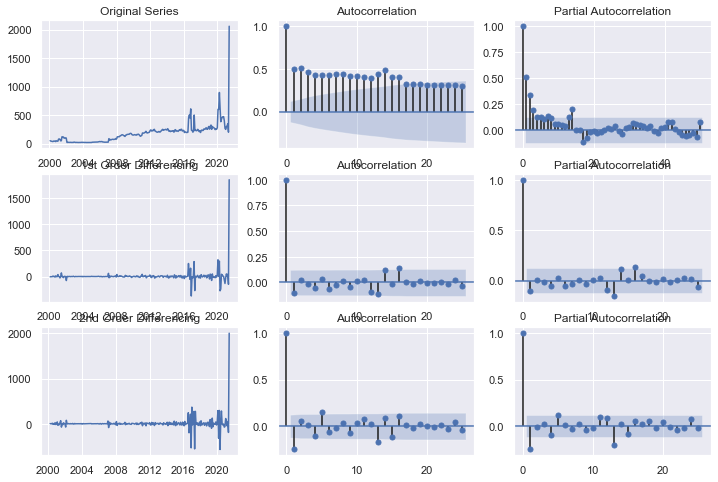

In [39]:
# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(gfp_monthly); axes[0, 0].set_title('Original Series')
plot_acf(gfp_monthly, ax=axes[0, 1])
plot_pacf(gfp_monthly, lags=50, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(gfp_monthly.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(gfp_monthly.diff().dropna(), ax=axes[1, 1])
plot_pacf((gfp_monthly).diff().dropna(), ax=axes[1, 2])


# 2nd Differencing
axes[2, 0].plot(gfp_monthly['price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(gfp_monthly.diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(gfp_monthly.diff().diff().dropna(), ax=axes[2, 2])

In [40]:
# ADF Test for 2 order of differencing
result = adfuller(gfp_monthly.diff().diff().dropna().values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in result[4].items():   
  print(f'   {k}: {v}')

ADF Statistic: -7.910592671393707
p-value: 3.957760204249669e-12
No. of observations used : 240
Critical Values:
   1%: -3.458128284586202
   5%: -2.873761835239286
   10%: -2.5732834559706235


### Box-Cox Tranformation

Transform the data to be normally distributed

In [41]:
from scipy.special import inv_boxcox
from scipy.stats import boxcox

In [42]:
# Box - Cox Transform
gfp_monthly['price'], lam = boxcox(gfp_monthly['price'])

In [43]:
# Box-cox transformation flag
input_transform_flag = 'Yes' 

In [44]:
gfp_monthly.head()

,price
date,
2000-01-31,6.42
2000-02-29,6.10
2000-03-31,5.93
2000-04-30,5.78
2000-05-31,5.56


In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Baseline Model - ARIMA

In [46]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gfp_monthly['price'], order=(1,2,1))
model_fit= model.fit()

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.price   No. Observations:                  255
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -351.243
Method:                       css-mle   S.D. of innovations              0.948
Date:                Wed, 14 Jul 2021   AIC                            710.487
Time:                        00:10:36   BIC                            724.652
Sample:                    03-31-2000   HQIC                           716.184
                         - 05-31-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.001      1.066      0.286      -0.001       0.002
ar.L1.D2.price    -0.3200      0.083     -3.833      0.000      -0.484      -0.156
ma.L1.D2.price    -1.0000      0.011    -89.721      0.000      -1.022      -0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1249           +0.0000j            3.1249            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

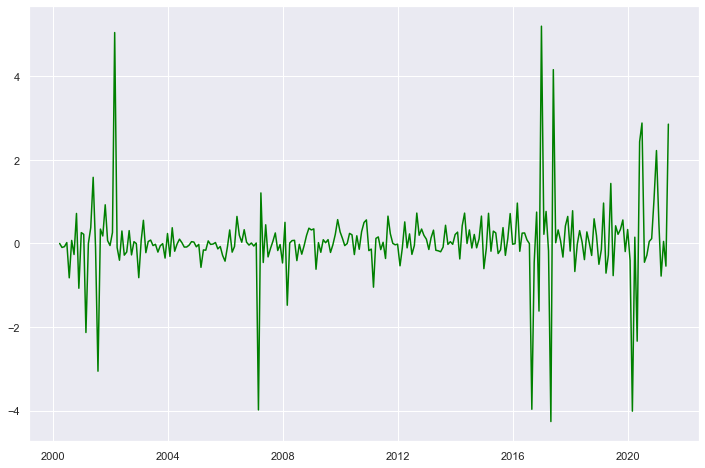

In [48]:
plt.plot(model_fit.fittedvalues, color='green')

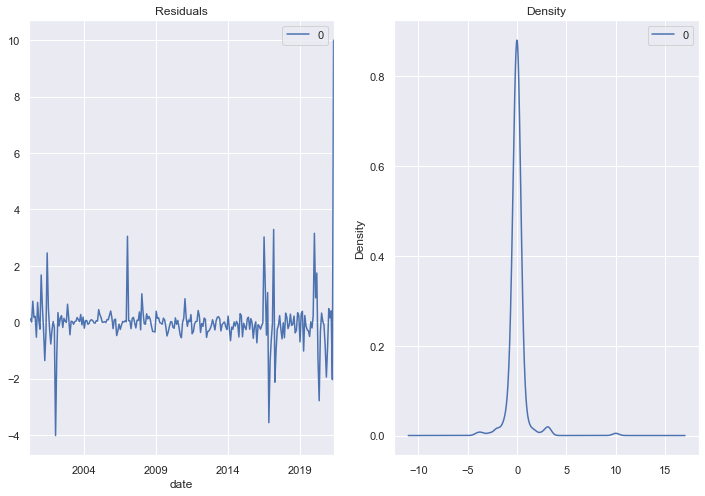

In [49]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])

In [50]:
residuals.describe()

,0
count,255.00
mean,-0.00
std,0.96
min,-4.02
25%,-0.23
50%,-0.01
75%,0.15
max,10.00


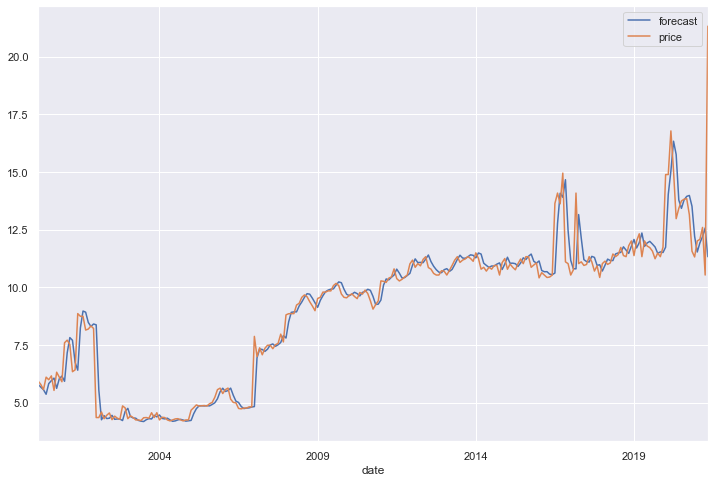

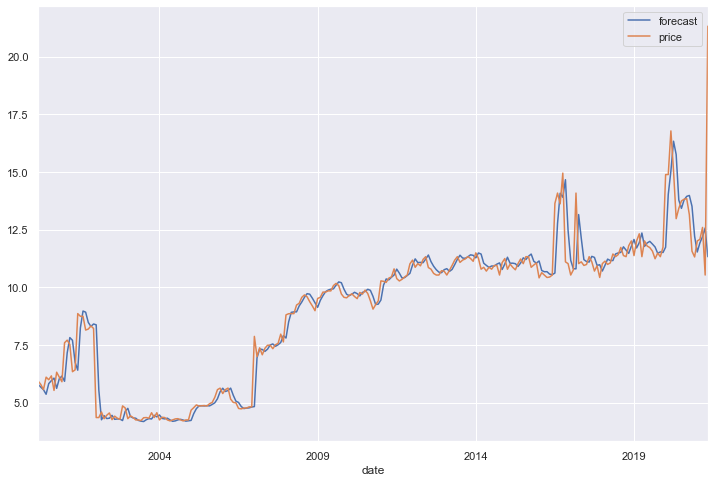

In [51]:
# Plot the original series and the forecasted series
model_fit.plot_predict(dynamic= False)

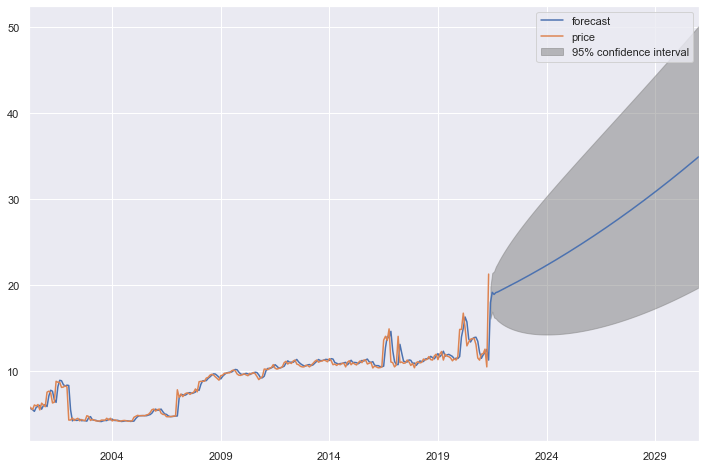

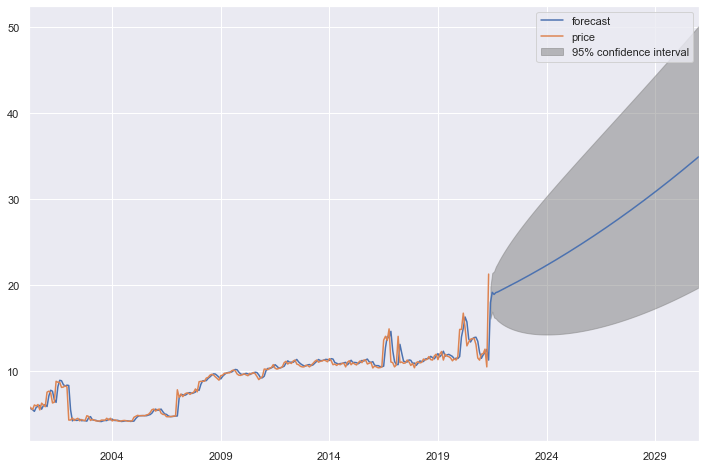

In [52]:
# Plot the original series and the forecasted series - Making prediction
model_fit.plot_predict(dynamic= False, start='2000', end='2031')


### Train - Test Split

In [53]:
train_size= int(gfp_monthly.shape[0]*0.7)
gfp_train, gfp_test = gfp_monthly.price[0:train_size], gfp_monthly.price[train_size:]
gfp_train.head()

date
2000-01-31   6.42
2000-02-29   6.10
2000-03-31   5.93
2000-04-30   5.78
2000-05-31   5.56
Freq: M, Name: price, dtype: float64

### Validate Model and Make Prediction

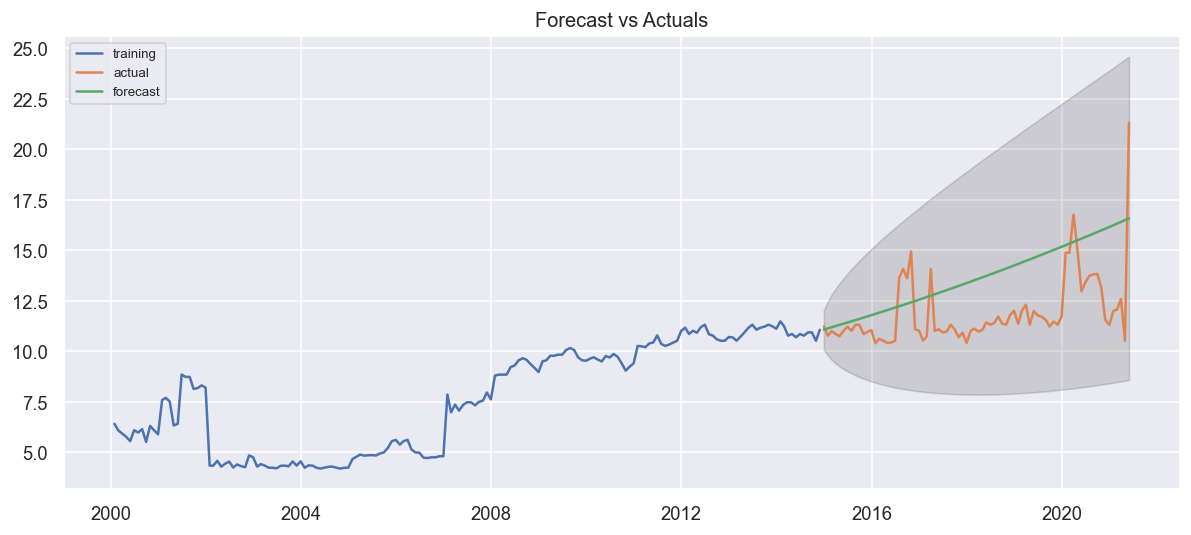

In [54]:
# Build Model
model = ARIMA(gfp_train, order=(1,2,1))
fitted = model.fit()

# Forecast
fc, se, conf = fitted.forecast(78, alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fc, index=gfp_test.index)
lower_series = pd.Series(conf[:, 0], index=gfp_test.index)
upper_series = pd.Series(conf[:, 1], index=gfp_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=120)
plt.plot(gfp_train, label='training')
plt.plot(gfp_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

### Inverse transform the actual and predicted values

In [55]:
#if input_transform_flag == 'Yes':
 #   gfp_test = inv_boxcox(gfp_test, lam)
  #  predictions = (fc_series, lam)

In [56]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast -actual)/np.abs(forecast))*100
    mae = np.mean(np.abs(forecast - actual)) 
    rmse = np.sqrt(np.mean((forecast - actual)**2))
    return({'mape':mape, 'mae': mae, 
           'rmse':rmse})


forecast_accuracy(fc, gfp_test.values)

{'mape': 14.894045293418293,
 'mae': 2.1140355588083026,
 'rmse': 2.4441230417698323}

In [57]:
#evaluate_model(fc_series, gfp_test)

In [58]:
import pickle

In [59]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [60]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model